#### inheritance

#### create a parent class

In [1]:
class Person(object): # parent class / base class / super class
  def __init__(self, fname, lname): # constructor
    self.firstname = fname # fristname is created here
    self.lastname = lname

  def printname(self): # method
    print(self.firstname, self.lastname)

#Use the Person class to create an object, and then execute the printname method:
x = Person("John", "Doe") # constructor call
x.printname() # method call

John Doe


#### create a child class

In [6]:
# Use the pass keyword when you do not want to add any other properties or methods to the class.

# Person : parent class / base class / super class
# Student : child class / derived class / sub class

# Person IS-A Student : Every person is not a student : incorrect
# class Person(Student): # Student pc, Person sub class
#     pass

# Student IS-A Person
class Student(Person): # Student derives all the properties and methods from Person class
  pass # printname() method exists, firstname, lastname also exists

x = Student("Tony", "Robbins") 
x.printname()

# when no constructor is specified in the child class
# class Student(Base):
#     def __init__(self, fname, lname):
#         call for base class constructor : Base(self, fname, lname) # default or parameterized
#         pass

Tony Robbins


#### add the _init_() function to child class

In [12]:
# When you add the __init__() function, the child class will no longer inherit the parent's __init__() function.
# The child's __init__() function overrides the inheritance of the parent's __init__() function.

class Student(Person):
  def __init__(self, fname, lname): # because of init in child class
    pass # call to base class construtor is not there

x = Student("Tony", "Robbins")

# x.firstname # AttributeError: 'Student' object has no attribute 'firstname'

# x.printname() 
# printname() is inherited from base class
# AttributeError: 'Student' object has no attribute 'firstname'

In [13]:
class Student(Person):
  def __init__(self, fname, lname):
    Person.__init__(self, fname, lname) # calling init of parent class from child class init
    # object firstname and lastname are created inside super class

x = Student("Tony", "Robbins")
x.printname()

Mike Olsen


#### use the super() function

In [14]:
class Student(Person):
  def __init__(self, fname, lname):
    super().__init__(fname, lname) 
    # object firstname and lastname are created inside super class

x = Student("Tony", "Robbins")
x.printname()

y = Student("Anu","lasya")
y.printname()

Tony Robbins
Anu lasya


#### add properties to child class

In [15]:
class Student(Person):
  def __init__(self, fname, lname):
    super().__init__(fname, lname)
    # here, it is out of parent class constructor
    self.graduationyear = 2019 # child class property

x = Student("Tony", "Robbins")
print(x.graduationyear) 

2019


In [19]:
p = Person("john",'tony')
print(p.firstname)
# print(p.graduationyear) # AttributeError: 'Person' object has no attribute 'graduationyear'

john


In [20]:
class Student(Person):
  def __init__(self, fname, lname, year): # year is local to child class init
    super().__init__(fname, lname) # firstname, lastname got created
    self.graduationyear = year # graduationyear is child class instance variable

x = Student("Tony", "Robbins", 2019)
print(x.graduationyear)
print(x.firstname)
print(x.lastname)

2019
Tony
Robbins


#### add methods to child class

In [21]:
class Student(Person):
  def __init__(self, fname, lname, year):
    super().__init__(fname, lname)
    self.graduationyear = year

  def welcome(self):
    print("Welcome", self.firstname, self.lastname, "to the class of", self.graduationyear)

x = Student("Tony", "Robbins", 2019)
x.welcome()

Welcome Tony Robbins to the class of 2019


- login -> object create => ....

#### check for subclass

In [4]:
class Base(object):
    pass   
  
class Derived(Base):
    pass  

True
False
True
True
True
False


#### issubclass()

In [6]:
print(issubclass(Derived, Base)) # True
print(issubclass(Base, Derived)) # False

True
False


#### isinstance()

In [7]:
d = Derived()
b = Base()
  
# d is an instance of Base
print(isinstance(d, Base)) # True
print(isinstance(d, Derived)) # True

# b is not an instance of Derived
print(isinstance(b, Base)) # True
print(isinstance(b, Derived)) # False 

True
True
True
False


#### super() to access immediate parent class method

In [8]:
class Square:
     def __init__(self, side):
         self.side = side
 
     def area(self):
         return self.side * self.side

In [26]:
# code redundancy in calculating face_area
# without super() or parent class name

class Cube(Square):
  def area(self):
    face_area = self.side * self.side
    return face_area * 6

  def volume(self):
    face_area = self.side * self.side
    return face_area * self.side

In [27]:
# using parent class name to access immediate parent class method

class Cube(Square):
  def area(self):
    return Square.area() * 6  #but difficulty when super class name is changed

  def volume(self):
    return Square.area() * self.side

In [28]:
# using super() to access immediate parent class method

class Cube(Square):
  def area(self):
    return super().area() * 6 

  def volume(self):
    return super().area() * self.side

#### super() to access non-immediate parent class method

In [8]:
class Square:
     def __init__(self, side):
         self.side = side
 
     def area(self):
         return self.side * self.side

In [29]:
class SquarePrism(Square):
     def __init__(self, side, height):
         self.side = side
         self.height = height
 
     def face_area(self):
         base_area = super().area()
         lateral_area = self.side * self.height
         return base_area, lateral_area
 
     def area(self):
         base_area = super().area()
         lateral_area = self.side * self.height
         return 2 * base_area + 4 * lateral_area

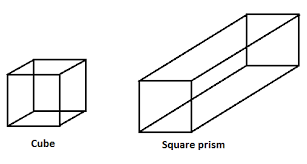

**parameterized super() method to access non-immediate parent class method**

In [33]:
class Cube(SquarePrism):
    def __init__(self, side):
        super().__init__(side = side, height = side)

    def face_area(self):
        return super(SquarePrism, self).area()

    def area(self):
        return super().area()